In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Change working directory
os.chdir(r"C:\Users\Abrar Zaheen\Desktop\house_price_project")

In [3]:
#Read data
df = pd.read_csv(r'data\train.csv')

In [4]:
#Separate features and target
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1].values

In [5]:
#Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [6]:
#Special categorical columns where NaN means "None" or absence
none_fill = [
    "PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
    "GarageType","GarageFinish","GarageQual","GarageCond",
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "MasVnrType"
]

#Separate the columns where NaN means missing (To be filled with mode)
mode_fill = [col for col in cat_cols if col not in none_fill]

#Numeric columns with missing (median impute)
num_fill = [col for col in num_cols if df[col].isnull().sum() > 0]

In [7]:
#Pipeline for applying multiple transformations on multiple columns at the same time
none_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant',fill_value='None')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

mode_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

In [8]:
#Fit and transform
preprocessor = ColumnTransformer([
    ('none_cat', none_pipeline, none_fill),
    ('mode_cat', mode_pipeline, mode_fill),
    ('num', num_pipeline, num_fill)
], remainder='passthrough')

X_preprocessed = preprocessor.fit_transform(X)

In [9]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=5)

In [10]:
#Build and train multi-regression model on training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
#Predict test data
y_pred = regressor.predict(X_test)

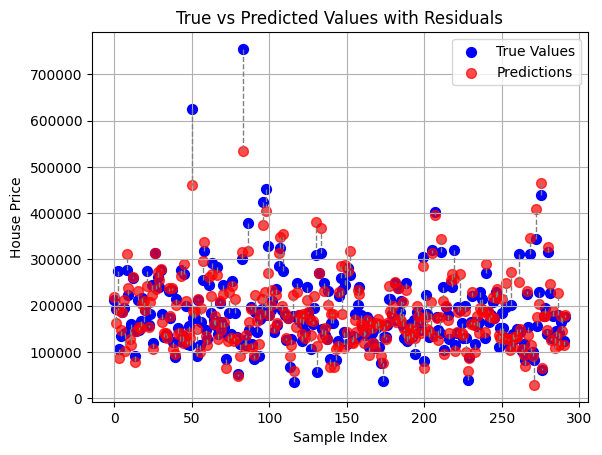

In [12]:
#Prediction vs Actual scatterplot
plt.scatter(range(len(y_test)), y_test, color='blue', s=50, label='True Values')
# Scatter plot of predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', s=50, label='Predictions', alpha=0.7)
# Draw vertical lines connecting true and predicted values
for i in range(len(y_test)):
    plt.plot([i, i], [y_test[i], y_pred[i]], color='gray', linestyle='--', linewidth=1)

plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.title('True vs Predicted Values with Residuals')
plt.legend()
plt.grid(True)
plt.show()